In [1]:
import h3 
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import folium 
import os 
import random
import plotly.graph_objects as go
from folium import plugins
from tqdm import tqdm
from plotly.subplots import make_subplots
import missingno as msno 
import json
import geojson
import matplotlib
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import warnings 

warnings.filterwarnings('ignore')

%matplotlib inline 
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df = pd.read_csv('eda_data.csv')
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,...,190,0,0,0,1,0,na,senior,6162,3
738,738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,...,14,1,0,1,1,0,data engineer,senior,6130,3
739,739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,...,36,0,0,0,0,1,na,na,3078,0
740,740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,...,-1,0,0,0,0,1,manager,na,1642,0


In [3]:
df.shape

(742, 33)

In [6]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().any()

Unnamed: 0           False
Job Title            False
Salary Estimate      False
Job Description      False
Rating               False
Company Name         False
Location             False
Headquarters         False
Size                 False
Founded              False
Type of ownership    False
Industry             False
Sector               False
Revenue              False
Competitors          False
hourly               False
employer_provided    False
min_salary           False
max_salary           False
avg_salary           False
company_txt          False
job_state            False
same_state           False
age                  False
python_yn            False
R_yn                 False
spark                False
aws                  False
excel                False
job_simp             False
seniority            False
desc_len             False
num_comp             False
dtype: bool

In [12]:
df.sample(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
108,108,Research Scientist,$38K-$85K (Glassdoor est.),Research Scientist\nLocation\n\n\nNebraska - O...,2.9,Boys Town Hospital\n2.9,"Omaha, NE","Omaha, NE",1001 to 5000 employees,1977,...,43,0,0,0,0,1,na,na,4917,3
530,530,"Sr Expert Data Science, Advanced Visual Analyt...",$80K-$133K (Glassdoor est.),"Posting Title\nSr Expert Data Science, Advance...",3.8,Novartis\n3.8,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,...,24,1,0,0,0,0,na,senior,4033,0
412,412,Geospatial Software Developer and Data Scientist,$82K-$129K(Employer est.),Job Posting Title:\n\nGeospatial Software Deve...,3.7,Applied Research Laboratories\n3.7,"Austin, TX","Austin, TX",501 to 1000 employees,-1,...,-1,1,0,0,1,0,data scientist,na,8734,0
394,394,Sr. Data Engineer,$75K-$140K (Glassdoor est.),Position Purpose\n\nAs a Senior Data Engineer ...,3.4,Echo Global Logistics\n3.4,"Chicago, IL","Chicago, IL",1001 to 5000 employees,2005,...,15,0,0,0,0,0,data engineer,senior,4288,3
391,391,"Scientist, Pharmacometrics",$84K-$157K (Glassdoor est.),"Scientist, Pharmacometrics\nLocation\n\n\nAgio...",3.8,Agios Pharmaceuticals\n3.8,"Cambridge, MA","Cambridge, MA",501 to 1000 employees,2008,...,12,0,0,0,0,0,na,na,2683,0


In [14]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,370.500000,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,214.341239,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,185.250000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,370.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,555.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,741.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

In [18]:
df_int = df.select_dtypes(include='int64')
df_int

,Unnamed: 0,Founded,hourly,employer_provided,min_salary,max_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
0,0,1973,0,0,53,91,0,47,1,0,0,0,1,2536,0
1,1,1984,0,0,63,112,0,36,1,0,0,0,0,4783,0
2,2,2010,0,0,80,90,1,10,1,0,1,0,1,3461,0
3,3,1965,0,0,56,97,1,55,1,0,0,0,0,3883,3
4,4,1998,0,0,86,143,1,22,1,0,0,0,1,2728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,737,1830,0,0,58,111,0,190,0,0,0,1,0,6162,3
738,738,2006,0,0,72,133,0,14,1,0,1,1,0,6130,3
739,739,1984,0,0,56,91,1,36,0,0,0,0,1,3078,0
740,740,-1,0,0,95,160,0,-1,0,0,0,0,1,1642,0


In [19]:
df_obj = df.select_dtypes(include='object')
df_obj

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors,company_txt,job_state,job_simp,seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Tecolote Research,NM,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,University of Maryland Medical System,MD,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,KnowBe4,FL,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",PNNL,WA,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Affinity Solutions,NY,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",GSK,MA,na,senior
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",Eventbrite,TN,data engineer,senior
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,Software Engineering Institute,PA,na,na
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,"Numeric, LLC",PA,manager,na


In [20]:
df_flt = df.select_dtypes(include='float64')
df_flt

,Rating,avg_salary
0,3.8,72.0
1,3.4,87.5
2,4.8,85.0
3,3.8,76.5
4,2.9,114.5
...,...,...
737,3.9,84.5
738,4.4,102.5
739,2.6,73.5
740,3.2,127.5


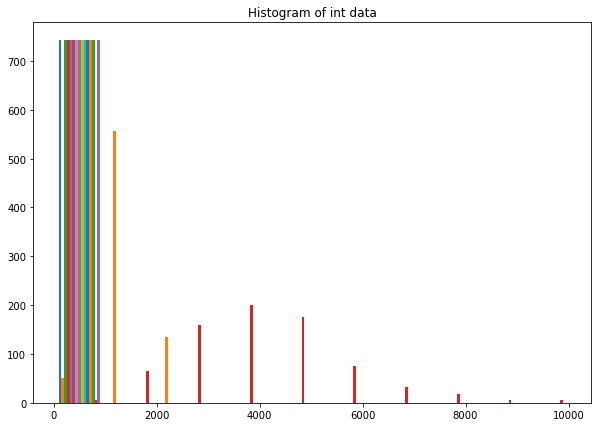

In [24]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(df_int)
plt.title('Histogram of int data')
plt.show()


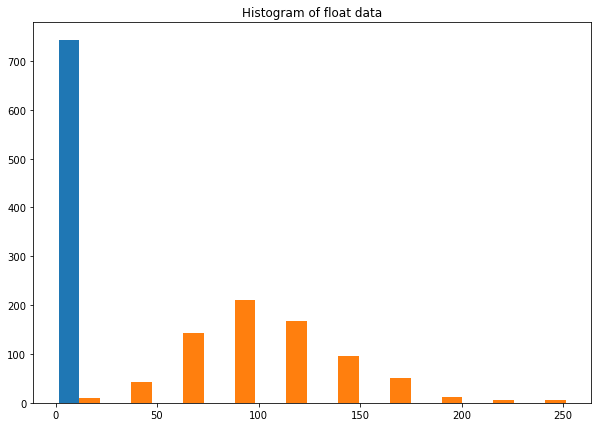

In [25]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(df_flt)
plt.title('Histogram of float data')
plt.show()


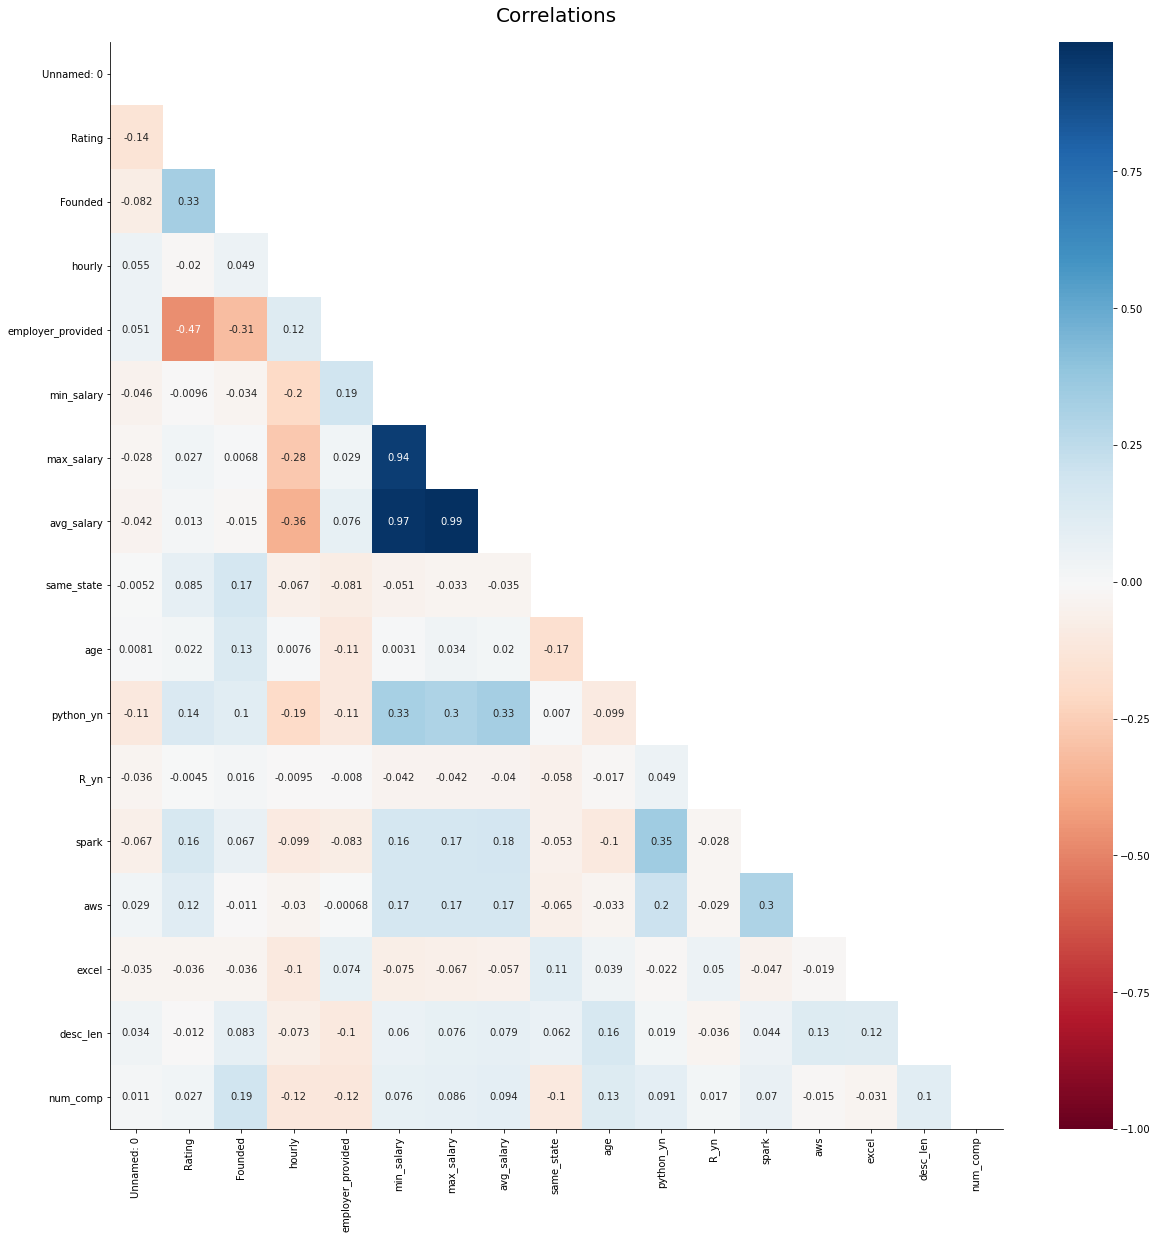

In [54]:
plt.figure(figsize= (20,20))
sns.heatmap(df.corr(),vmin = -1, cmap = 'RdBu', annot = True, mask = np.triu(np.ones_like(df.corr())))
plt.title('Correlations', fontsize = 20, pad = 20)
sns.despine()
plt.show()

<Figure size 1440x1440 with 0 Axes>

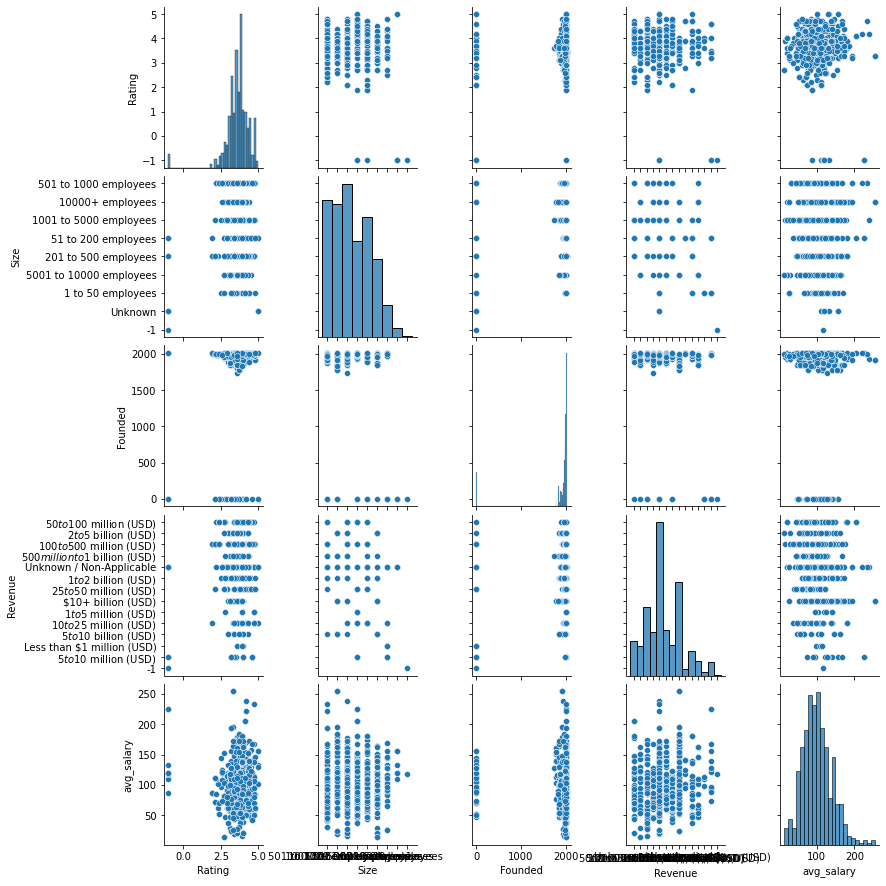

In [55]:
plt.figure(figsize= (20,20))
sns.pairplot(df, x_vars = ['Rating', 'Size', 'Founded', 'Revenue', 'avg_salary'], y_vars = ['Rating', 'Size', 'Founded', 'Revenue', 'avg_salary'])
sns.despine()
plt.show()

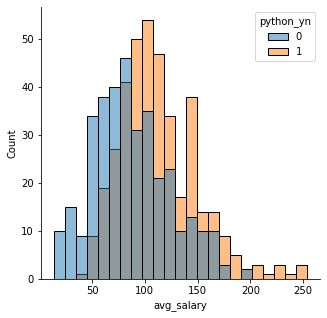

In [56]:
plt.figure(figsize= (5,5))
sns.histplot(data = df, x = 'avg_salary', hue = 'python_yn')
sns.despine()
plt.show()

In [33]:
df1 = pd.read_csv('salary_data_cleaned.csv')
df1

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,84.5,GSK\n,MA,0,190,0,0,0,1,0
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,102.5,Eventbrite\n,TN,0,14,1,0,1,1,0
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,73.5,Software Engineering Institute\n,PA,1,36,0,0,0,0,1
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,127.5,"Numeric, LLC\n",PA,0,-1,0,0,0,0,1


In [34]:
df1.shape

(742, 28)

In [39]:
df1.duplicated().sum()

275

In [41]:
df1.isnull().any()

Job Title            False
Salary Estimate      False
Job Description      False
Rating               False
Company Name         False
Location             False
Headquarters         False
Size                 False
Founded              False
Type of ownership    False
Industry             False
Sector               False
Revenue              False
Competitors          False
hourly               False
employer_provided    False
min_salary           False
max_salary           False
avg_salary           False
company_txt          False
job_state            False
same_state           False
age                  False
python_yn            False
R_yn                 False
spark                False
aws                  False
excel                False
dtype: bool

In [57]:
df1['Job Title'].value_counts()
# all Job Title are jobs of data science.

Data Scientist                                                                       131
Data Engineer                                                                         53
Senior Data Scientist                                                                 34
Data Analyst                                                                          15
Senior Data Engineer                                                                  14
                                                                                    ... 
Data Scientist - Bioinformatics                                                        1
Senior Machine Learning (ML) Engineer / Data Scientist - Cyber Security Analytics      1
Healthcare Data Scientist                                                              1
Senior Data Analyst/Scientist                                                          1
Survey Data Analyst                                                                    1
Name: Job Title, Leng

In [58]:
high_salary_100 = df1['avg_salary'].sort_values(ascending=False).head(100)
high_salary_100
# avg_salary to 100th in high ranking 254.0 ~ 142.5

708    254.0
354    254.0
528    254.0
103    237.5
429    232.5
       ...  
451    143.5
57     143.5
24     143.0
255    143.0
42     142.5
Name: avg_salary, Length: 100, dtype: float64

In [62]:
low_salary_100 = df1['avg_salary'].sort_values().head(100)
low_salary_100
# avg_salary to 100th in low ranking 13.5 ~ 61.0

618    13.5
409    13.5
240    15.5
210    20.0
246    20.5
       ... 
475    61.0
150    61.0
329    61.0
8      61.0
275    61.0
Name: avg_salary, Length: 100, dtype: float64

In [65]:
high_salary_100.index
# select and labeling for high_salary data 

Int64Index([708, 354, 528, 103, 429, 176, 266, 613, 195, 330, 476, 410, 616,
            507, 681, 473,  46, 193, 328, 471, 377, 585,  71, 446,  91, 494,
            619, 667, 608, 496, 159, 226, 220, 155, 283, 133, 549, 637, 375,
            565, 474, 440, 314, 219, 154,  10, 243, 298, 600, 395, 698, 518,
            270, 627, 416, 178, 109, 256,  45, 373, 676, 448, 503, 336, 488,
            342,  56, 662, 137,  17, 433, 691, 514, 259, 172,  76, 168, 250,
            318, 443, 183, 281,  38, 626, 272, 130, 462, 179, 291, 185,  15,
            459, 163, 234, 423, 451,  57,  24, 255,  42],
           dtype='int64')

In [68]:
high_salary_100_data = df1.loc[high_salary_100.index]
high_salary_100_data.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
708,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,Company - Private,...,254.0,Liberty Mutual Insurance\n,IL,0,108,1,0,0,0,0
354,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,Company - Private,...,254.0,Liberty Mutual Insurance\n,IL,0,108,1,0,0,0,0


In [69]:
high_salary_100_data['salary_grade'] = 'high'
high_salary_100_data.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,salary_grade
708,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,Company - Private,...,Liberty Mutual Insurance\n,IL,0,108,1,0,0,0,0,high
354,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,Company - Private,...,Liberty Mutual Insurance\n,IL,0,108,1,0,0,0,0,high


In [71]:
# select and labeling for low_salary data 

low_salary_100_data = df1.loc[low_salary_100.index]
low_salary_100_data['salary_grade'] = 'low'
low_salary_100_data.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,salary_grade
618,"Senior Operations Data Analyst, Call Center Op...",$10-$17 Per Hour(Glassdoor est.),Summary\n\n\nIndependent contributor role that...,2.7,FLEETCOR\n2.7,"Nashville, TN","Peachtree Corners, GA",5001 to 10000 employees,2000,Company - Public,...,FLEETCOR\n,TN,0,20,0,0,0,0,1,low
409,"Senior Operations Data Analyst, Call Center Op...",$10-$17 Per Hour(Glassdoor est.),Summary\n\n\nIndependent contributor role that...,2.7,FLEETCOR\n2.7,"Nashville, TN","Peachtree Corners, GA",5001 to 10000 employees,2000,Company - Public,...,FLEETCOR\n,TN,0,20,0,0,0,0,1,low


In [72]:
high_low_salary_200 = pd.concat([high_salary_100_data, low_salary_100_data])
high_low_salary_200.tail(2)
# 200 rows × 29 columns

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,salary_grade
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,...,Rochester Regional Health\n,NY,1,6,0,0,0,0,0,low
275,Excel / VBA / SQL Data Analyst,$44K-$78K (Glassdoor est.),Excel / VBA / SQL Data Analyst\n\nLocation:\nH...,4.1,Associated Electric Cooperative\n4.1,"Springfield, MO","Springfield, MO",501 to 1000 employees,1961,Company - Private,...,Associated Electric Cooperative\n,MO,1,59,0,0,0,0,1,low


In [73]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

In [74]:
fig = px.box(high_low_salary_200, x="salary_grade", y="Rating", points="all")
fig.show()

In [75]:
fig = px.box(high_low_salary_200, x="salary_grade", y="Founded", points="all")
fig.show()

In [76]:
fig = px.box(high_low_salary_200, x="salary_grade", y="age", points="all")
fig.show()

In [77]:
fig = px.box(high_low_salary_200, x="salary_grade", y="avg_salary", points="all")
fig.show()

In [78]:
import plotly.express as ex

ex.pie(high_salary_100_data, names='Job Title',title='high salary Job',hole=0.3, width=1000, height=800)

In [79]:
ex.pie(low_salary_100_data, names='Job Title',title='low salary Job',hole=0.3, width=1000, height=800)

In [80]:
high_low_salary_200.groupby('salary_grade')['python_yn'].sum()

salary_grade
high    73
low     20
Name: python_yn, dtype: int64

In [81]:
high_low_salary_200.groupby('salary_grade')['R_yn'].sum()

salary_grade
high    0
low     1
Name: R_yn, dtype: int64

In [82]:
high_low_salary_200.groupby('salary_grade')['spark'].sum()

salary_grade
high    36
low      6
Name: spark, dtype: int64

In [83]:
high_low_salary_200.groupby('salary_grade')['aws'].sum()

salary_grade
high    38
low     12
Name: aws, dtype: int64

In [84]:
high_low_salary_200.groupby('salary_grade')['excel'].sum()

salary_grade
high    56
low     52
Name: excel, dtype: int64

In [85]:
high_low_salary_200_location = high_low_salary_200[['Location', 'min_salary', 'max_salary', 'avg_salary', 'salary_grade']]
high_low_salary_200_location.head()

,Location,min_salary,max_salary,avg_salary,salary_grade
708,"Chicago, IL",202,306,254.0,high
354,"Chicago, IL",202,306,254.0,high
528,"Chicago, IL",202,306,254.0,high
103,"Washington, DC",200,275,237.5,high
429,"San Francisco, CA",176,289,232.5,high


In [86]:
v_split = high_low_salary_200_location.Location.str.split(', ')
v_split.head()

708          [Chicago, IL]
354          [Chicago, IL]
528          [Chicago, IL]
103       [Washington, DC]
429    [San Francisco, CA]
Name: Location, dtype: object

In [87]:
high_low_salary_200_location['city'] = v_split.str.get(0)
high_low_salary_200_location['state'] = v_split.str.get(1)
high_low_salary_200_location = high_low_salary_200_location.drop(['Location'], axis=1)
high_low_salary_200_location

,min_salary,max_salary,avg_salary,salary_grade,city,state
708,202,306,254.0,high,Chicago,IL
354,202,306,254.0,high,Chicago,IL
528,202,306,254.0,high,Chicago,IL
103,200,275,237.5,high,Washington,DC
429,176,289,232.5,high,San Francisco,CA
...,...,...,...,...,...,...
475,42,80,61.0,low,Chicago,IL
150,44,78,61.0,low,Clearwater,FL
329,42,80,61.0,low,Chicago,IL
8,38,84,61.0,low,Rochester,NY


In [88]:
high_salary_location = high_low_salary_200_location[high_low_salary_200_location['salary_grade']=='high']
high_salary_location

,min_salary,max_salary,avg_salary,salary_grade,city,state
708,202,306,254.0,high,Chicago,IL
354,202,306,254.0,high,Chicago,IL
528,202,306,254.0,high,Chicago,IL
103,200,275,237.5,high,Washington,DC
429,176,289,232.5,high,San Francisco,CA
...,...,...,...,...,...,...
451,111,176,143.5,high,Brisbane,CA
57,111,176,143.5,high,Saint Louis,MO
24,109,177,143.0,high,Herndon,VA
255,109,177,143.0,high,Herndon,VA


In [89]:
low_salary_location = high_low_salary_200_location[high_low_salary_200_location['salary_grade']=='low']
low_salary_location

,min_salary,max_salary,avg_salary,salary_grade,city,state
618,10,17,13.5,low,Nashville,TN
409,10,17,13.5,low,Nashville,TN
240,15,16,15.5,low,Port Washington,NY
210,15,25,20.0,low,New Orleans,LA
246,17,24,20.5,low,West Reading,PA
...,...,...,...,...,...,...
475,42,80,61.0,low,Chicago,IL
150,44,78,61.0,low,Clearwater,FL
329,42,80,61.0,low,Chicago,IL
8,38,84,61.0,low,Rochester,NY


In [90]:
ex.pie(high_salary_location, names='state',title='high salary state',hole=0.3, width=500, height=500)

In [91]:
ex.pie(high_salary_location, names='city',title='high salary city',hole=0.3, width=800, height=800)

In [92]:
ex.pie(low_salary_location, names='state',title='low salary state',hole=0.3, width=500, height=500)

In [93]:
ex.pie(low_salary_location, names='city',title='low salary city',hole=0.3, width=800, height=800)